# c-09

In [97]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

# Classification

In [98]:
fmnist_data = keras.datasets.fashion_mnist

In [99]:
(x_train, y_train), (x_test, y_test) = fmnist_data.load_data()

In [100]:
x_train.shape

(60000, 28, 28)

In [101]:
x_test.shape

(10000, 28, 28)

In [102]:
y_train.shape

(60000,)

In [103]:
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

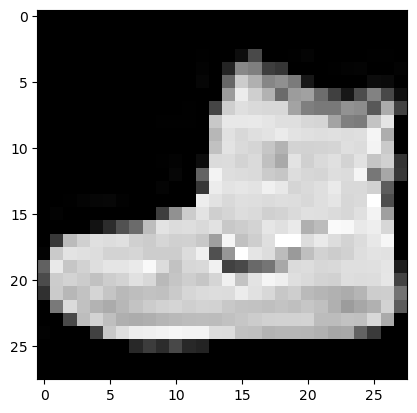

In [104]:
plt.imshow(x_train[0,], cmap="gray")

In [105]:
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define Model

In [106]:
init_1 = keras.initializers.VarianceScaling(scale=2.0, mode='fan_avg', distribution='uniform')

In [107]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    # keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal" ),
    keras.layers.Dense(100, kernel_initializer=init_1, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("elu"),
    keras.layers.Dense(75, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.LeakyReLU(alpha=0.3),
    keras.layers.Dense(10, activation="softmax")
])

/media/saeed/9e9baace-4b04-4b10-9642-9956879cddb6/repositories/machine-learning/tensorflow-course/start-tensorflow/envs/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/media/saeed/9e9baace-4b04-4b10-9642-9956879cddb6/repositories/machine-learning/tensorflow-course/start-tensorflow/envs/lib/python3.11/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [108]:
model.layers

[<Flatten name=flatten_4, built=True>,
 <BatchNormalization name=batch_normalization_12, built=True>,
 <Dense name=dense_14, built=True>,
 <BatchNormalization name=batch_normalization_13, built=True>,
 <Activation name=activation_4, built=True>,
 <Dense name=dense_15, built=True>,
 <BatchNormalization name=batch_normalization_14, built=True>,
 <LeakyReLU name=leaky_re_lu_4, built=True>,
 <Dense name=dense_16, built=True>]

In [109]:
weights = model.layers[1].get_weights()

In [110]:
weights

[array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 

# Save Model

In [111]:
model.save("model0.keras")
model0 = keras.models.load_model("model0.keras")

In [112]:
model0.get_weights()[4]

array([[-0.03457751,  0.00865403, -0.10999532, ...,  0.11362827,
        -0.05340271,  0.08229484],
       [ 0.05647242,  0.10970065,  0.04369602, ..., -0.04833324,
         0.00024981, -0.05587275],
       [-0.09098715, -0.08569773,  0.10400183, ...,  0.07253915,
        -0.07024448,  0.06679998],
       ...,
       [-0.06858106,  0.10906678, -0.08325583, ...,  0.04189669,
        -0.10975443,  0.00222982],
       [ 0.00770266, -0.00233329,  0.04256941, ..., -0.04629593,
        -0.02969115,  0.07293783],
       [-0.07660603,  0.04243016, -0.01141824, ..., -0.08016153,
         0.0200718 ,  0.08931305]], shape=(784, 100), dtype=float32)

# Cloning Model

In [113]:
model0_cloned = keras.models.clone_model(model0)
model0_cloned.set_weights(model0_cloned.get_weights())

In [114]:
model0.get_weights()[4]

array([[-0.03457751,  0.00865403, -0.10999532, ...,  0.11362827,
        -0.05340271,  0.08229484],
       [ 0.05647242,  0.10970065,  0.04369602, ..., -0.04833324,
         0.00024981, -0.05587275],
       [-0.09098715, -0.08569773,  0.10400183, ...,  0.07253915,
        -0.07024448,  0.06679998],
       ...,
       [-0.06858106,  0.10906678, -0.08325583, ...,  0.04189669,
        -0.10975443,  0.00222982],
       [ 0.00770266, -0.00233329,  0.04256941, ..., -0.04629593,
        -0.02969115,  0.07293783],
       [-0.07660603,  0.04243016, -0.01141824, ..., -0.08016153,
         0.0200718 ,  0.08931305]], shape=(784, 100), dtype=float32)

In [115]:
model0.layers

[<Flatten name=flatten_4, built=True>,
 <BatchNormalization name=batch_normalization_12, built=True>,
 <Dense name=dense_14, built=True>,
 <BatchNormalization name=batch_normalization_13, built=True>,
 <Activation name=activation_4, built=True>,
 <Dense name=dense_15, built=True>,
 <BatchNormalization name=batch_normalization_14, built=True>,
 <LeakyReLU name=leaky_re_lu_4, built=True>,
 <Dense name=dense_16, built=True>]

In [116]:
model0.layers[4].trainable

True

In [117]:
model1 = keras.models.Sequential([model0.layers[-1]])

In [118]:
model1.add(keras.layers.Dense(1, activation="sigmoid"))

In [119]:
model1.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 10)             │           760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 760 (2.97 KB)

 Trainable params: 760 (2.97 KB)

 Non-trainable params: 0 (0.00 B)

In [120]:
for layer in model1.layers:
    print(layer.trainable)

True
True


In [130]:
for layer in model1.layers[:-1]:
  layer.trainable = False
  print(layer.trainable)

False


In [122]:
model1.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 10)             │           760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 760 (2.97 KB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 760 (2.97 KB)

In [123]:
x_train = x_train[:100]
x_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [124]:
y_train

array([9, 0, 0, ..., 3, 0, 5], shape=(60000,), dtype=uint8)

In [125]:
x_train_new = x_train[:5000, :, :]
x_train_new

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [126]:
y_train_new = np.where(y_train == 9, 1, 0)[:5000]
y_train_new

array([1, 0, 0, ..., 0, 0, 0], shape=(5000,))

In [127]:
np.sum(y_train_new)

np.int64(506)

# Compile Model

In [131]:
model1.compile(loss="binary_crossentropy", optimizer="sgd", metrics=["accuracy"])

# Fit Model

In [129]:
model1.fit(x_train_new, y_train_new, epochs=5, validation_split=0.15)

Epoch 1/5


ValueError: Input 0 of layer "dense_16" is incompatible with the layer: expected axis -1 of input shape to have value 75, but received input with shape (None, 28, 28)